In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


**1. Reading CSV file**

In [67]:
df=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [68]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [69]:
df.describe(include="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Statistical information about the data

**2. Brief info about data**

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**3. Checking the null value counts.**

In [71]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

* As we can see more null value counts in dish_liked column

In [72]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [73]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**4. Drop listed_in(city) as "location" columns already exists**

In [74]:
df=df.drop(["listed_in(city)"],axis=1)

In [75]:
df=df.rename(columns={"approx_cost(for two people)":"cost/2ppl","listed_in(type)":"dish_type"})

In [76]:
df["cost/2ppl"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [77]:
df["cost/2ppl"].isnull().sum()

346

* There are 346 null values in cost/2ppl. We should handle null values properly

In [78]:
df.dtypes

url             object
address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
phone           object
location        object
rest_type       object
dish_liked      object
cuisines        object
cost/2ppl       object
reviews_list    object
menu_item       object
dish_type       object
dtype: object

**5. Replacing comma(,) in cost/2ppl column with ("")**

In [79]:
df["cost/2ppl"]=df["cost/2ppl"].apply(lambda x:str(x).replace(",",""))

* Cleaning the cost/2ppl column by removing the comma

**6. Fill the null values in column by replacing with mean of the values.**

In [80]:
df["cost/2ppl"]=df["cost/2ppl"].fillna(df["cost/2ppl"].astype(float).mean())

In [81]:
df["cost/2ppl"].isnull().sum()

0

* Now no null values in cost/2ppl column

In [82]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**7. Custom function to clean the data in rate column**

In [83]:
def rateclean(value):
    if(value=="NEW" or value=="nan" or value=="-"):
        return np.nan
    return float(str(value).replace("/5",""))

* It is a function to replace /5 from the column, so to clean the datas

In [84]:
df["rate"]=df["rate"].apply(rateclean)

In [85]:
df["rate"].isnull().sum()

10052

* There are 10052 null values in rate column. We should handle it by replacing with mean of that column.

In [86]:
df["rate"]=df["rate"].fillna(df["rate"].mean())

In [87]:
df["rate"].isnull().sum()

0

In [88]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost/2ppl           0
reviews_list        0
menu_item           0
dish_type           0
dtype: int64

In [89]:
df=df.dropna(subset=["cuisines"])

In [90]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone            1179
location            0
rest_type         206
dish_liked      28033
cuisines            0
cost/2ppl           0
reviews_list        0
menu_item           0
dish_type           0
dtype: int64

In [91]:
df=df.drop(["dish_liked","phone"],axis=1)

In [92]:
df

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost/2ppl,reviews_list,menu_item,dish_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,Bar,Finger Food,600,[],[],Pubs and bars
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,Bar,Finger Food,2000,[],[],Pubs and bars
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars


In [93]:
df.isnull().sum()

url               0
address           0
name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type       206
cuisines          0
cost/2ppl         0
reviews_list      0
menu_item         0
dish_type         0
dtype: int64

In [94]:
df=df.dropna(subset=["rest_type"])

In [95]:
df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost/2ppl       0
reviews_list    0
menu_item       0
dish_type       0
dtype: int64

* All the null values handled properly now.

In [96]:
df.shape

(51466, 14)

In [97]:
cuisine_types=df["cuisines"].value_counts()

In [131]:
cuisine_types

North Indian                                       2899
North Indian, Chinese                              2361
South Indian                                       1828
Biryani                                             909
Bakery, Desserts                                    907
                                                   ... 
Chinese, Thai, Pan Asian                              1
North Eastern, Street Food                            1
Continental, North Indian, Chinese, Pizza, Thai       1
Chinese, North Indian, Street Food, Rolls             1
North Indian, Chinese, Arabian, Momos                 1
Name: cuisines, Length: 2712, dtype: int64

In [98]:
cuisine_typeslessthan1000=cuisine_types[cuisine_types<100]

* Lets cluster the cuisine types which are having counts less than 100 as one type("others").

In [99]:
cuisine_typeslessthan1000

North Indian, Continental, Chinese                 97
Juices                                             94
Bengali, North Indian                              93
Fast Food, North Indian                            93
Chinese, North Indian, South Indian                90
                                                   ..
Chinese, Thai, Pan Asian                            1
North Eastern, Street Food                          1
Continental, North Indian, Chinese, Pizza, Thai     1
Chinese, North Indian, Street Food, Rolls           1
North Indian, Chinese, Arabian, Momos               1
Name: cuisines, Length: 2643, dtype: int64

In [100]:
def cuisinecluster(value):
    if value in cuisine_typeslessthan1000:
        return "others"
    else:
        return value

* It is a function to handle the cuisine cluster to others.

In [101]:
df["cuisines"]=df["cuisines"].apply(cuisinecluster)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df.cuisines.value_counts()

others                                 26362
North Indian                            2899
North Indian, Chinese                   2361
South Indian                            1828
Biryani                                  909
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [103]:
df.location.unique()


array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [104]:
locations=df.location.value_counts()

In [105]:
locationsless400=locations[locations<400]

In [106]:
locationsless400

Commercial Street                370
St. Marks Road                   343
Koramangala 8th Block            312
Vasanth Nagar                    295
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     238
Koramangala 3rd Block            216
Basaveshwara Nagar               191
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Seshadripuram                    165
Hennur                           161
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    111
South Bangalore                  107
Koramangala 2nd Block            102
Hosur Road                       102
Kaggadasapura                    101
CV Raman Nagar                    90
V

In [107]:
def locationcluster(value):
    if value in locationsless400:
        return "others"
    else:
        return value

In [108]:
df["location"]=df["location"].apply(locationcluster)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df["location"].value_counts()

others                   5711
BTM                      5097
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1141
Sarjapur Road            1057
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              904
Kalyan Nagar              844
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Brookefield               658
Banaswadi                 656
New BEL Road              646
Kammanahalli              643
Rajajinagar               591
Church Street             569
Lavelle Ro

In [110]:
rest_types=df.rest_type.value_counts()

In [111]:
resttyeps_lessthan1000=rest_types[rest_types<1000]

In [112]:
resttyeps_lessthan1000

Beverage Shop                 865
Bar                           697
Food Court                    623
Sweet Shop                    468
Bar, Casual Dining            425
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

In [113]:
def rest_type_cluster(value):
    if value in resttyeps_lessthan1000:
        return "others"
    else:
         return value

In [114]:
df.rest_type=df.rest_type.apply(rest_type_cluster)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [115]:
df["rest_type"].value_counts()

Quick Bites           19129
Casual Dining         10326
others                 9092
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [116]:
print(df["rest_type"].where(df["rest_type"]=="Cafe"))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
51712    NaN
51713    NaN
51714    NaN
51715    NaN
51716    NaN
Name: rest_type, Length: 51466, dtype: object


In [117]:
df

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost/2ppl,reviews_list,menu_item,dish_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,others,Finger Food,600,[],[],Pubs and bars
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,others,Finger Food,2000,[],[],Pubs and bars
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars


In [118]:
df=df.drop(["reviews_list","menu_item","address","url"],axis=1)

* The above columns does not count for calculating the rating of restuarants, hence dropping them.

In [119]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost/2ppl,dish_type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700449,0,Whitefield,others,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700449,0,Whitefield,others,Finger Food,2000,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500,Pubs and bars


In [120]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost/2ppl', 'dish_type'],
      dtype='object')

In [121]:
df.dish_type.value_counts()

Delivery              25799
Dine-out              17686
Desserts               3583
Cafes                  1722
Drinks & nightlife     1101
Buffet                  878
Pubs and bars           697
Name: dish_type, dtype: int64

**8. Data Visualization**

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='online_order', ylabel='count'>

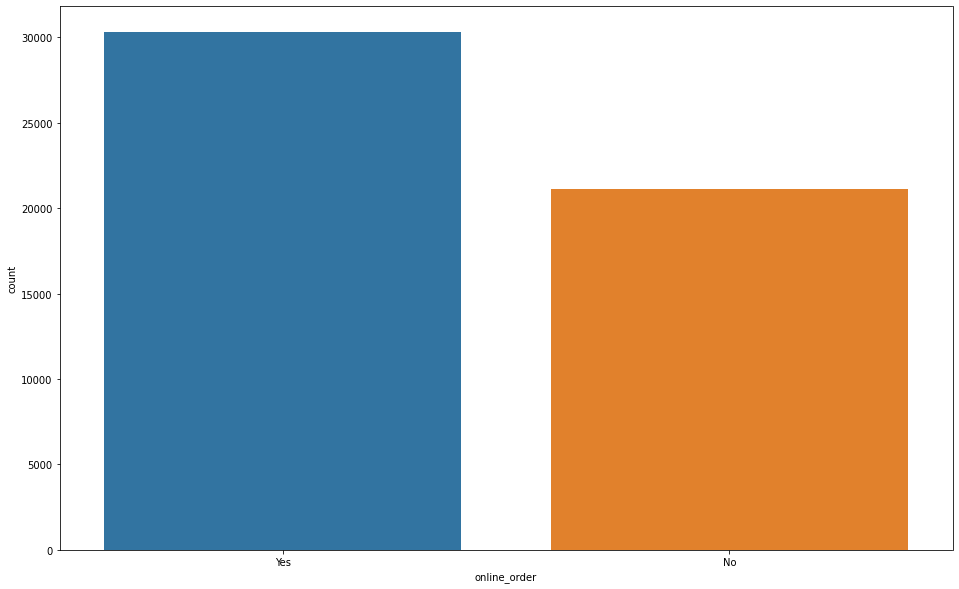

In [123]:
plt.figure(figsize=(16,10))
sns.countplot("online_order",data=df)
#plt.xticks(rotation=90)

* As we can see from countplot most of the people in Bengaluru do online order.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='book_table', ylabel='count'>

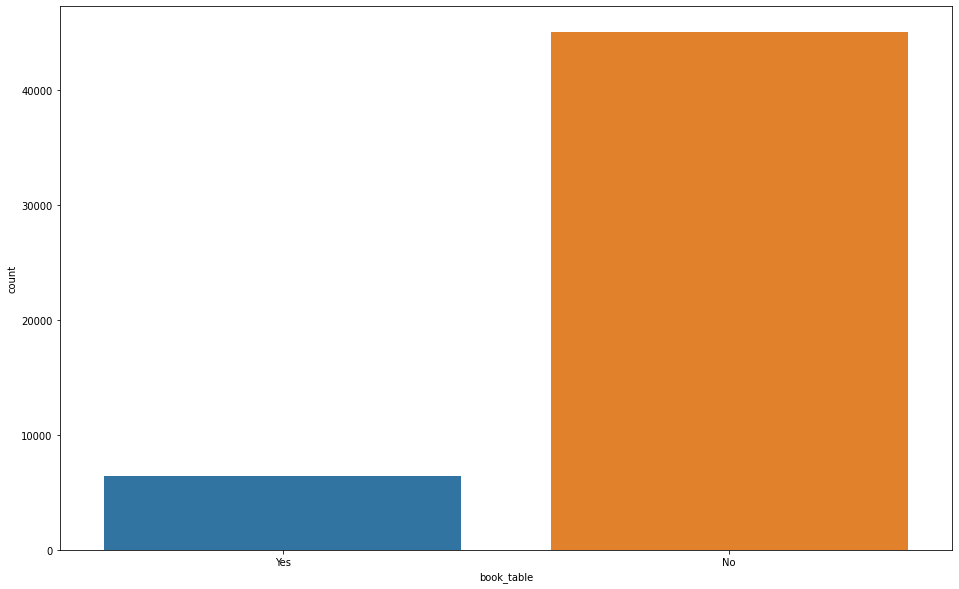

In [124]:
plt.figure(figsize=(16,10))
sns.countplot("book_table",data=df)

* 80-90% resturants are not book table. Only around 10% are book table in 5 star hotels.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

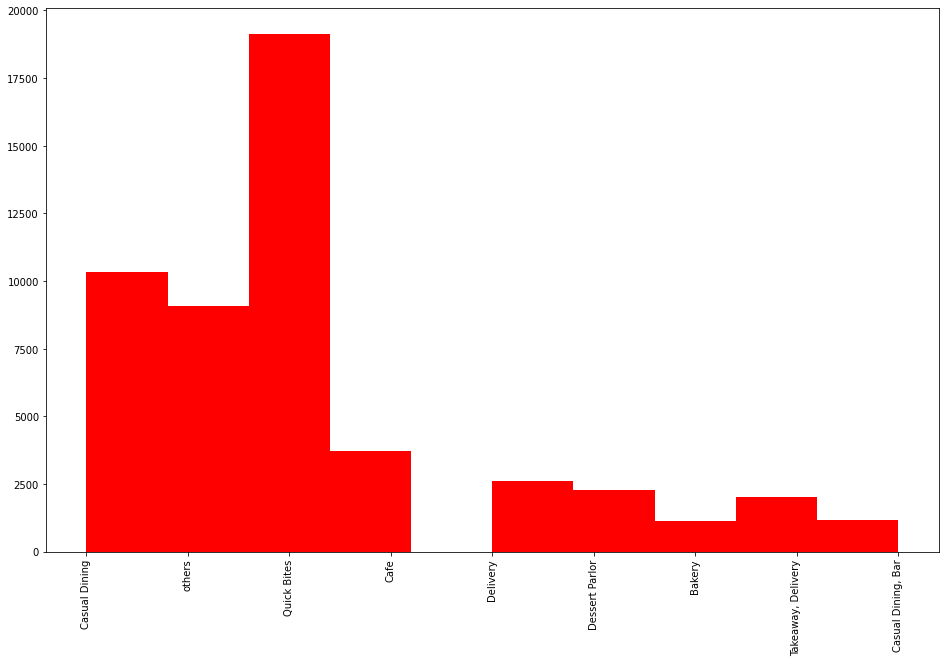

In [125]:
plt.figure(figsize=(16,10))
plt.hist(df["rest_type"],histtype="bar", cumulative=False,color="red")
plt.xticks(rotation=90)


* As we can see most of the restuarants are Quick Bites type. Bakery and Bar restuarants are less number in type.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dish_type', ylabel='count'>

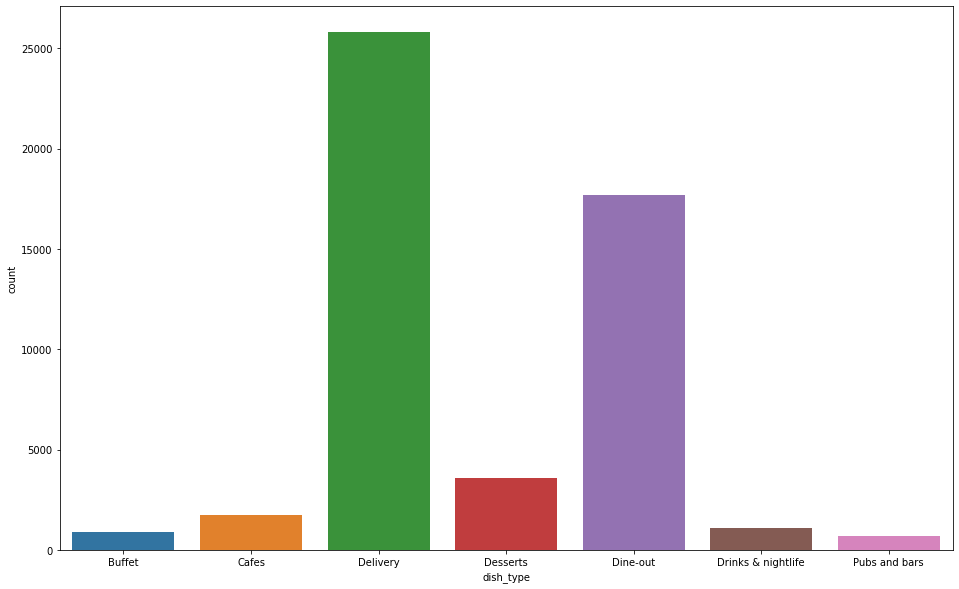

In [126]:
plt.figure(figsize=(16,10))
sns.countplot("dish_type",data=df)

* Most of the dish types are Delivery.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dish_type', ylabel='count'>

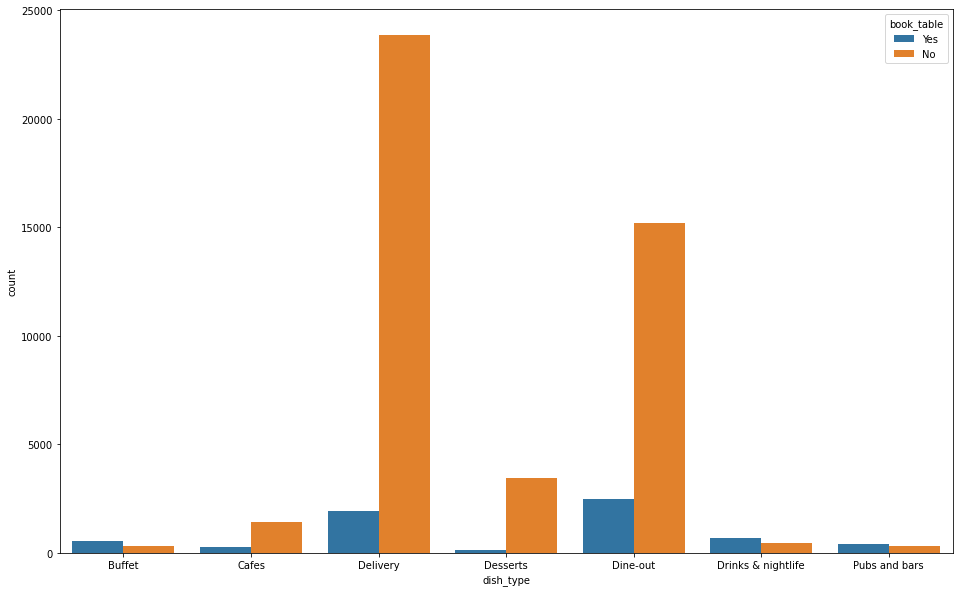

In [127]:
plt.figure(figsize=(16,10))
sns.countplot("dish_type",data=df,hue="book_table")

* As from above plot Delivery is more when book tabel is less.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dish_type', ylabel='count'>

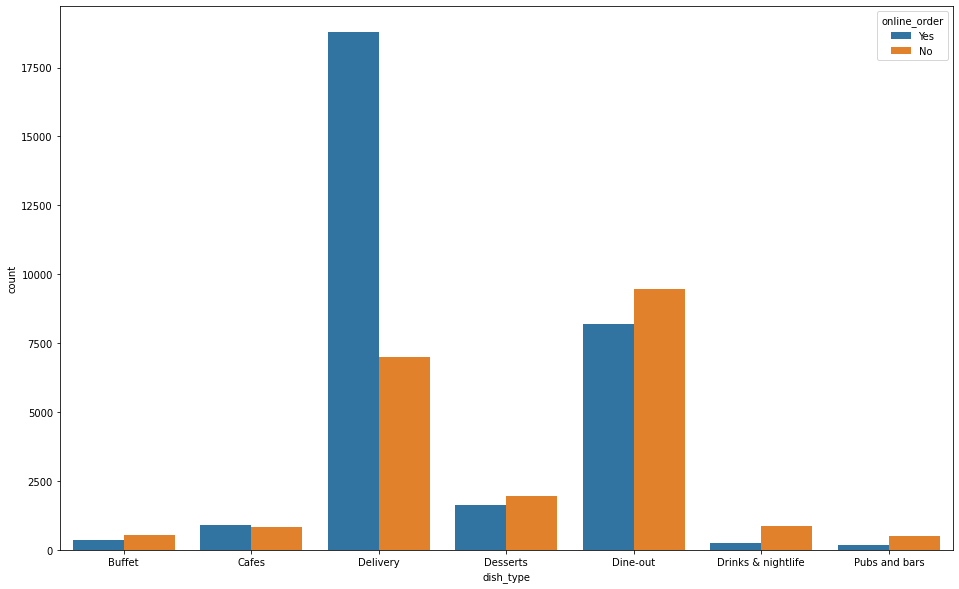

In [128]:
plt.figure(figsize=(16,10))
sns.countplot("dish_type",data=df,hue="online_order")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  Text(26,

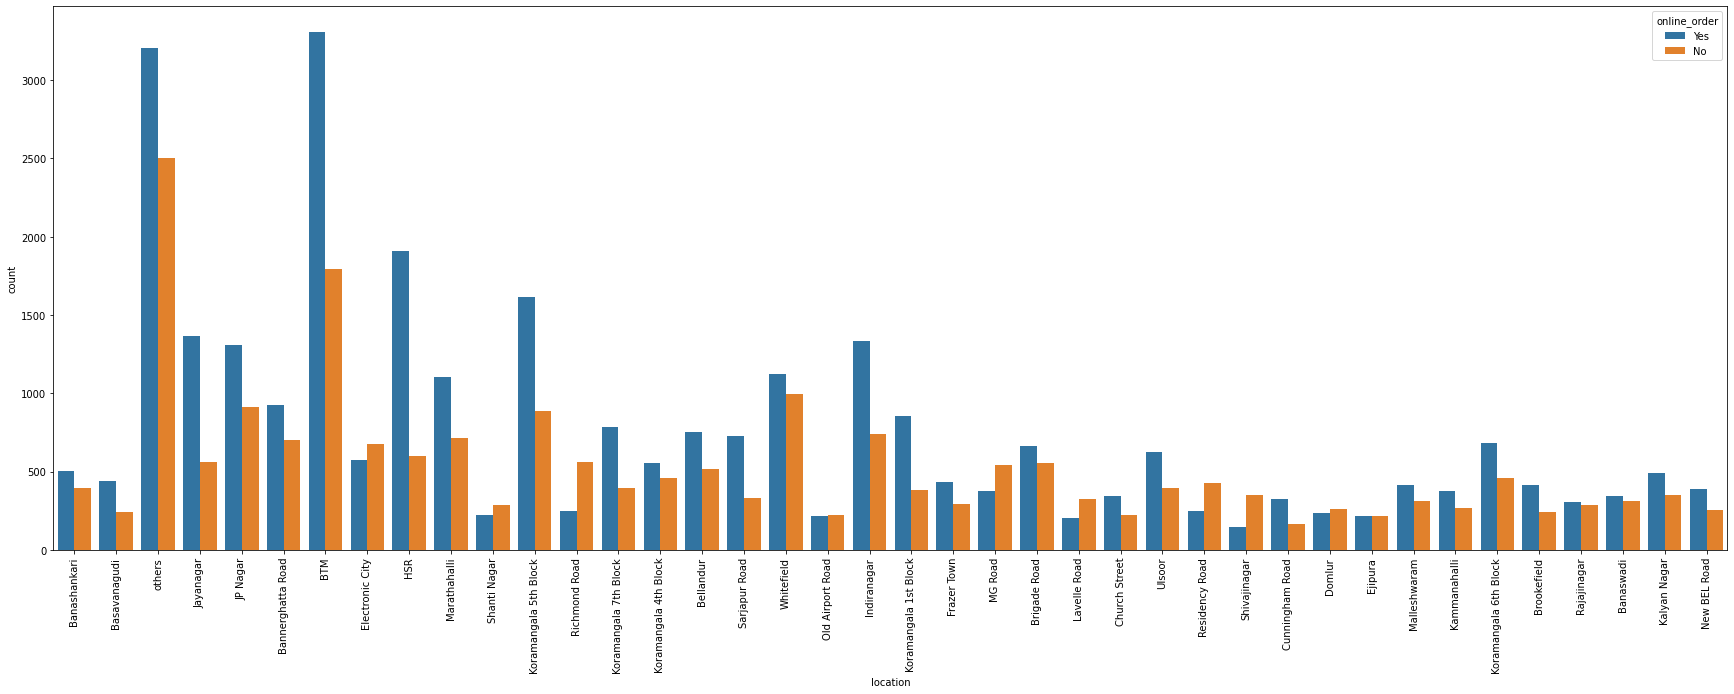

In [129]:
plt.figure(figsize=(30,10))
sns.countplot("location",data=df,hue="online_order")
plt.xticks(rotation=90)

* BTM location has most online order restuarants and Old airport has less count.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  Text(26,

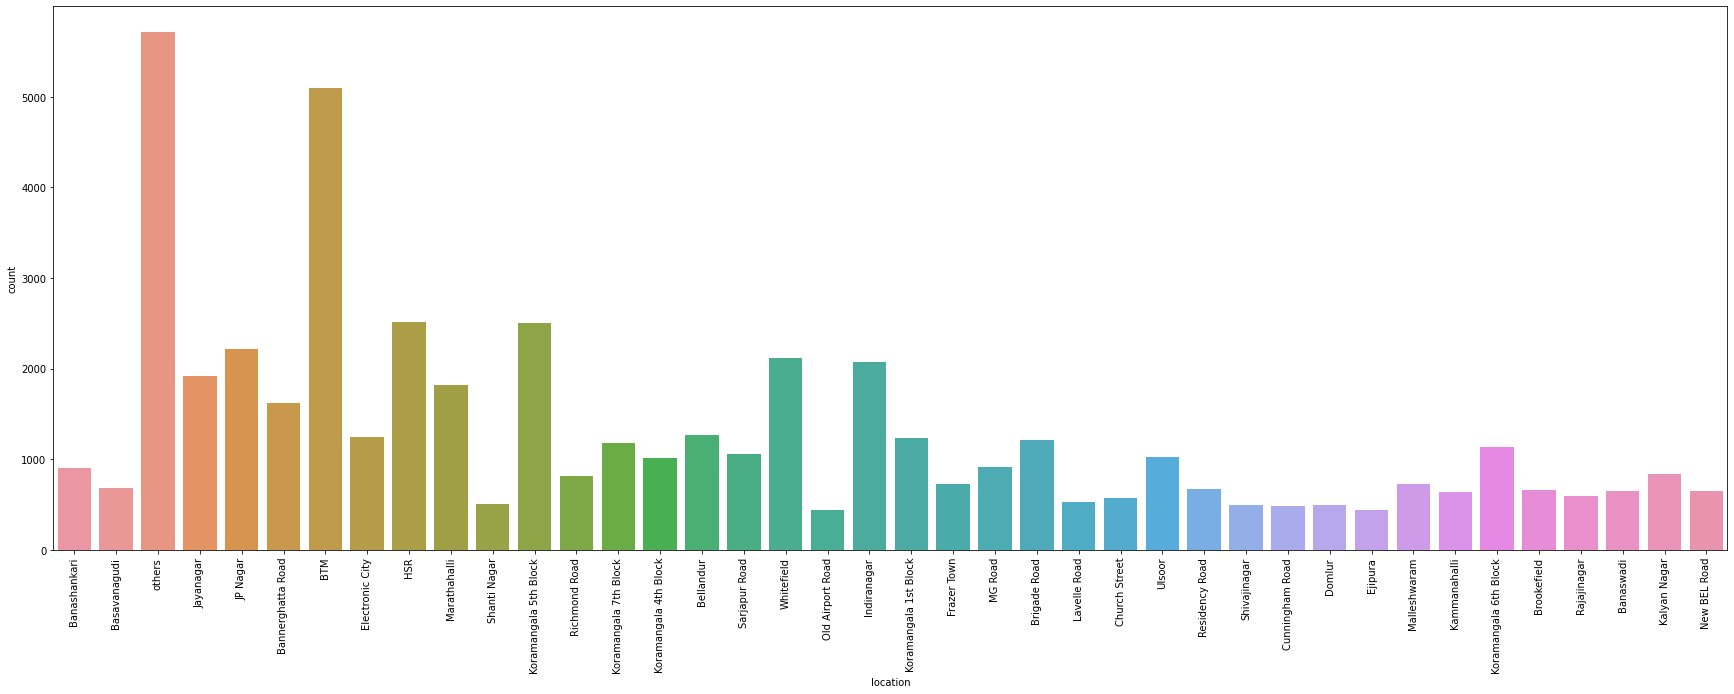

In [130]:
plt.figure(figsize=(30,10))
sns.countplot("location",data=df)
plt.xticks(rotation=90)

* BTM location has most resturants. Old Airport Road has less restuarants as it far from central Bengaluru.

In [133]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost/2ppl', 'dish_type'],
      dtype='object')

(array([   40.,   143.,   657.,  2385.,  5710.,  8525., 21614.,  8308.,
         3496.,   588.]),
 array([1.8 , 2.11, 2.42, 2.73, 3.04, 3.35, 3.66, 3.97, 4.28, 4.59, 4.9 ]),
 <BarContainer object of 10 artists>)

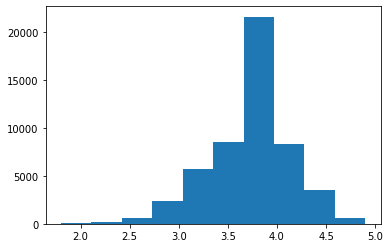

In [135]:
plt.hist(df["rate"])

* Most of the restuarants are rated from 3.5 to 4.0. Only few resturants rated 4.5 to 5.0.